### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 30th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [1]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

import scipy
import swiftascmaps

#### 1.1

In [3]:
hw7_data_1 = np.load('/Users/toralcm/repos/astr_8070_s24/coursework/homeworks/hw_data/hw7_data_1.npy');

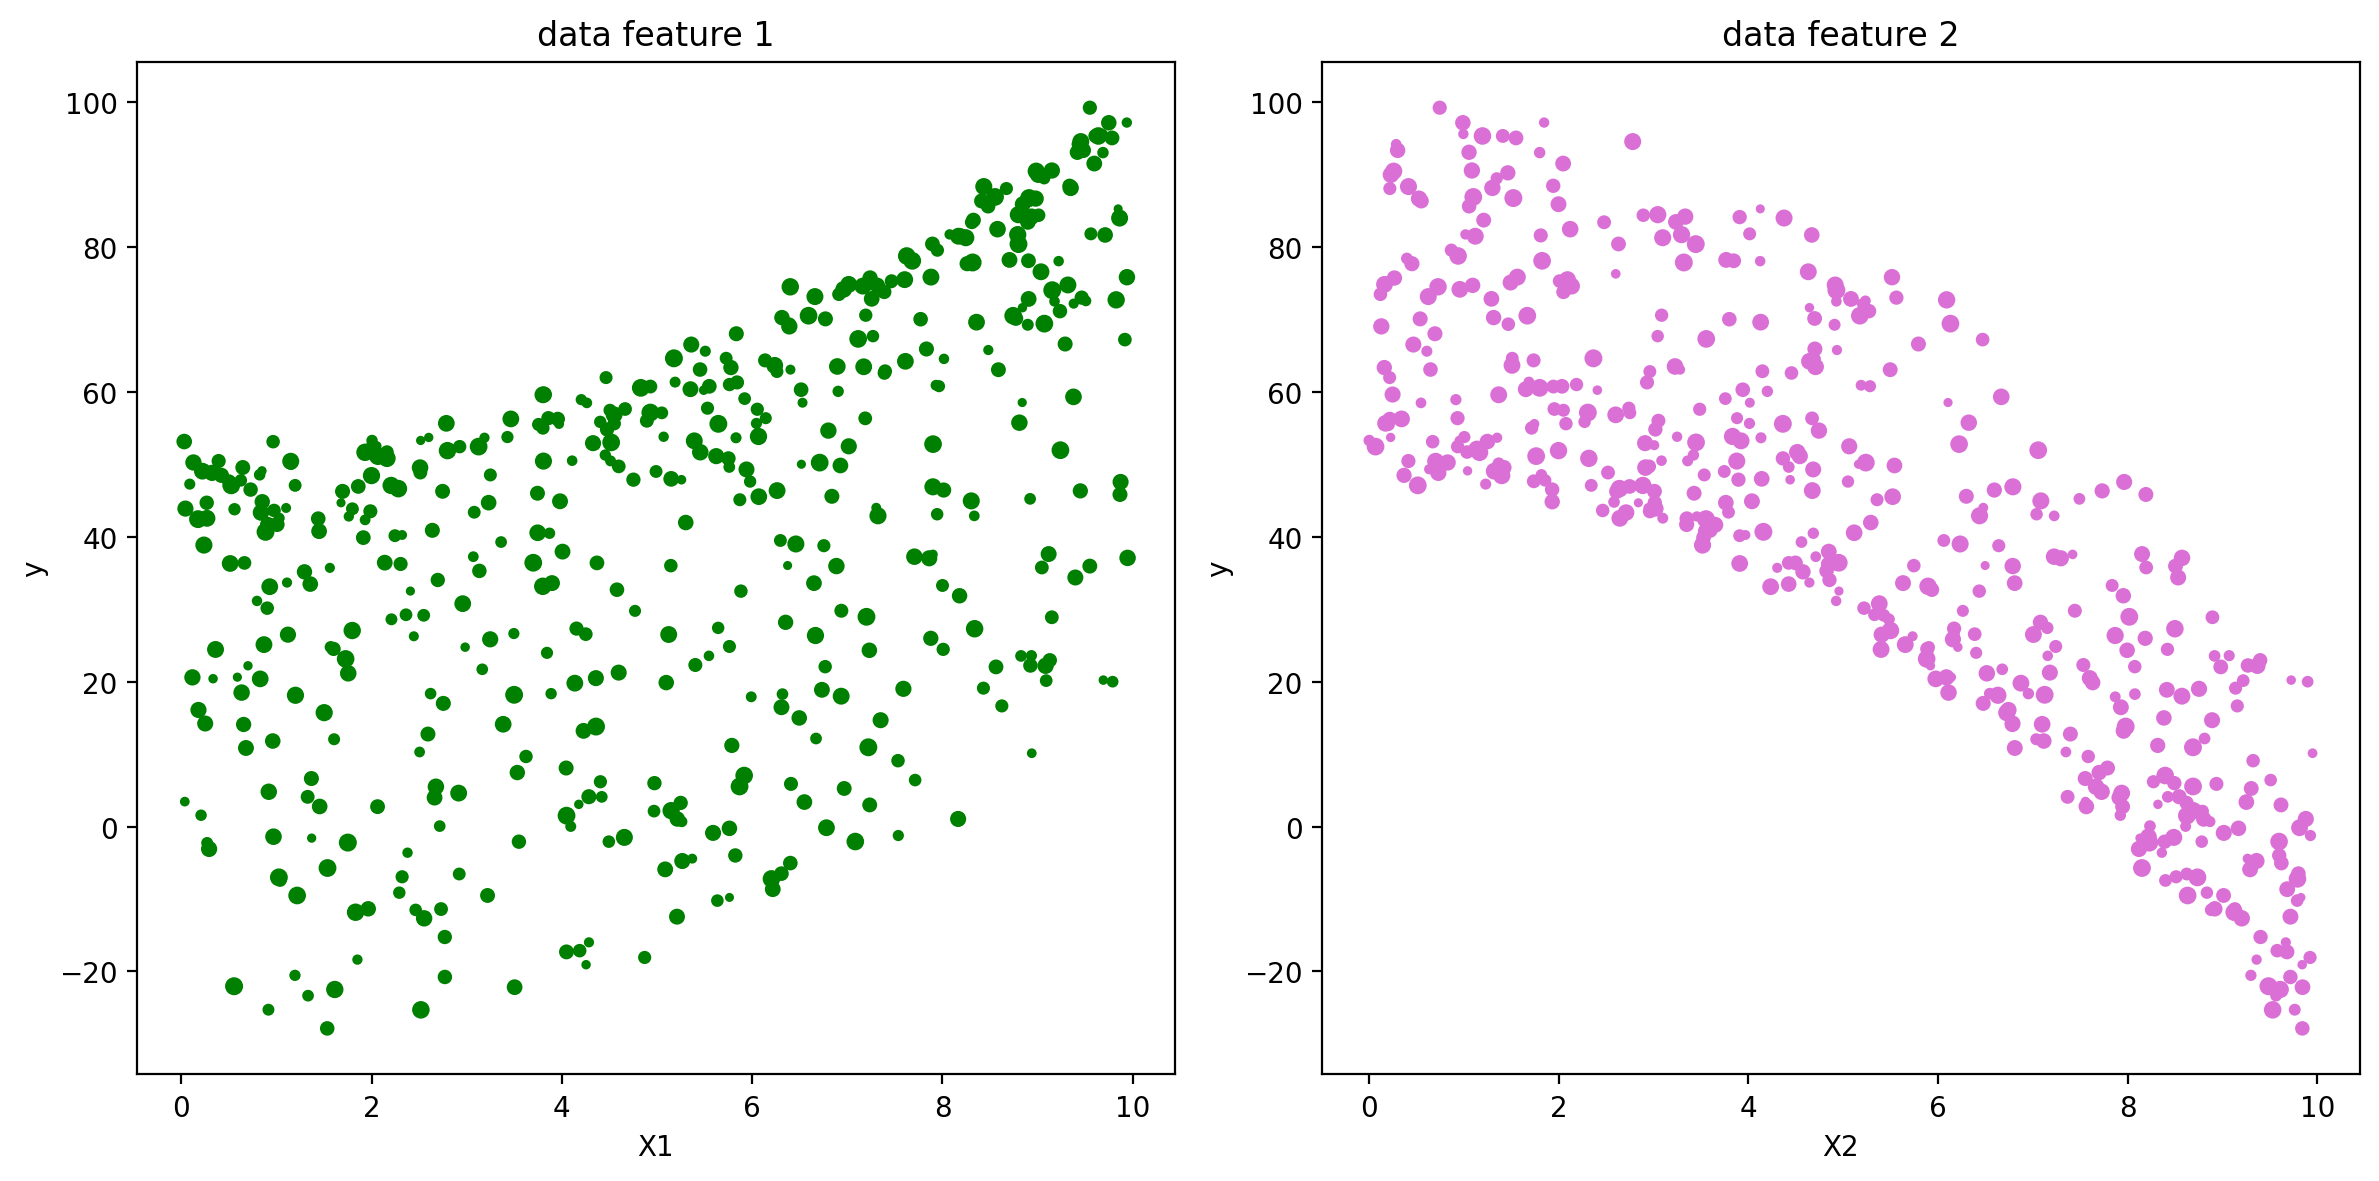

In [4]:
X = hw7_data_1[:,0:2] #data features
y = hw7_data_1[:,2] #target labels
yerr = hw7_data_1[:,3] #uncertainties

#plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(X[:,0],y,s=yerr*10,c='green')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('y')
axs[0].set_title('data feature 1')

axs[1].scatter(X[:,1],y,s=yerr*10,c='orchid')
axs[1].set_xlabel('X2')
axs[1].set_ylabel('y')
axs[1].set_title('data feature 2')

plt.tight_layout()
plt.show()



#### 1.2

In [5]:
from astroML.linear_model import LinearRegression

ytest = np.random.normal(X[:,0] + X[:,1], yerr) # y = 0 + 1*x1 + 1*x2

model = LinearRegression()
model.fit(X, ytest, yerr)

print("best-fit intercept:",model.coef_[0])
print("slopes:",model.coef_[1],model.coef_[2]) #slopes

best-fit intercept: 0.0466841757562602
slopes: 1.0210736705645485 0.9835049951797538


/Users/toralcm/anaconda3/envs/astr8070/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [6]:
print(X[:,0].min(),X[:,0].max())
print(X[:,1].min(),X[:,1].max())

0.029542954023376033 9.946084302327826
0.004170309106973358 9.950075144284998


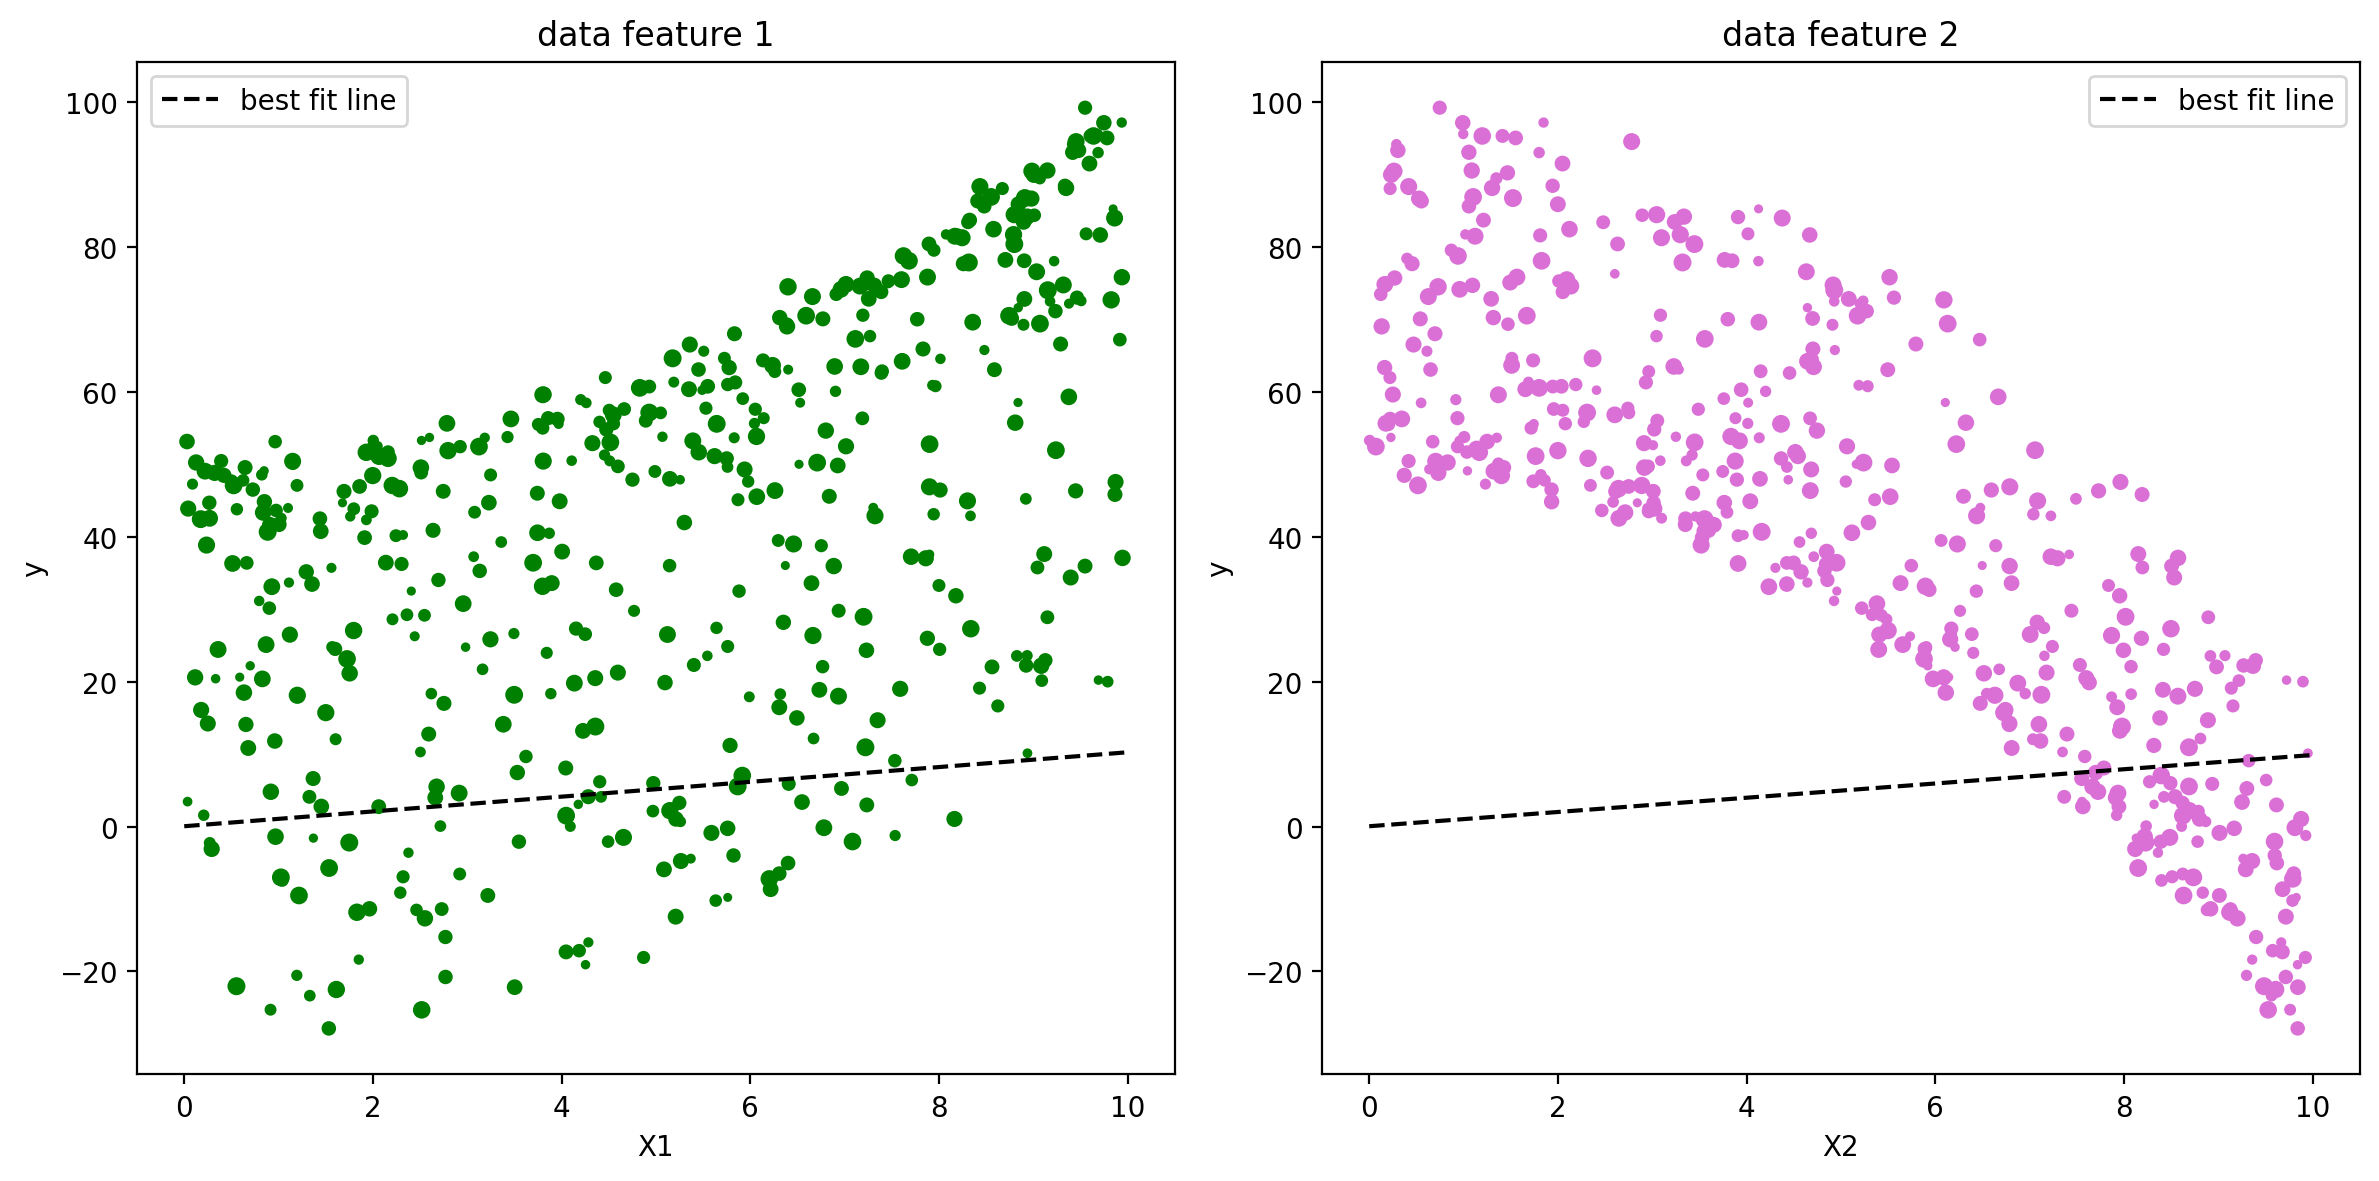

In [7]:

#scatter plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(X[:,0],y,s=yerr*10,c='green')
axs[0].set_xlabel('X1')
axs[0].set_ylabel('y')
axs[0].set_title('data feature 1')

axs[1].scatter(X[:,1],y,s=yerr*10,c='orchid')
axs[1].set_xlabel('X2')
axs[1].set_ylabel('y')
axs[1].set_title('data feature 2')

#best-fit model
Xgrid = np.linspace(0,10,50)
Y1 = (model.coef_[1]*Xgrid) + model.coef_[0]
Y2 = (model.coef_[2]*Xgrid) + model.coef_[0]
axs[0].plot(Xgrid, Y1, color='black',linestyle='--',label='best fit line')
axs[1].plot(Xgrid,Y2,color='black',linestyle='--',label='best fit line')

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()


This is a poor description of the data

#### 1.3

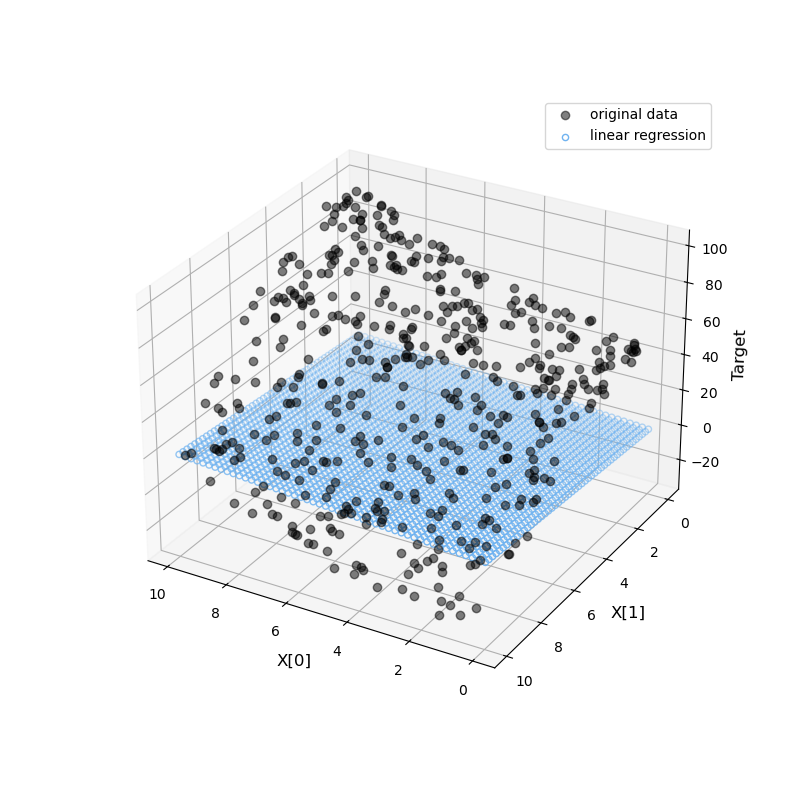

In [86]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib widget 

#meshgrid
x1grid = np.linspace(X[:,0].min(),X[:,0].max(),50)
x2grid = np.linspace(X[:,1].min(),X[:,1].max(),50)
X1meshgrid, X2meshgrid = np.meshgrid(x1grid,x2grid) 

#predict the labels
XGrid = np.column_stack([X1meshgrid.flatten(), X2meshgrid.flatten()])
predict_y = model.predict(XGrid)

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k',  #original data points
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label='original data')
ax.scatter(X1meshgrid.flatten(), X2meshgrid.flatten(), predict_y, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0',label='linear regression')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)
plt.show()

In [60]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

#### 1.4

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}

gridsearchcv = GridSearchCV(estimator=Ridge(), param_grid=ridge_params)
gridsearchcv.fit(X,y)

print("best_params:",gridsearchcv.best_params_)
print("best_score_:",gridsearchcv.best_score_)

best_params: {'alpha': 1.0, 'solver': 'svd'}
best_score_: 0.9290800590702192


In [123]:
#fit the data with the best options
best_alpha = gridsearchcv.best_params_['alpha']
best_solver = gridsearchcv.best_params_['solver']

gridsearch2 = GridSearchCV(estimator=Ridge(alpha=best_alpha, solver=best_solver),param_grid=ridge_params)
gridsearch2.fit(X,y) #fit the data with the best results

GridSearchCV(estimator=Ridge(solver='svd'),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.5, 1.0],
                         'solver': ['svd', 'lsqr']})

In [108]:
%matplotlib inline

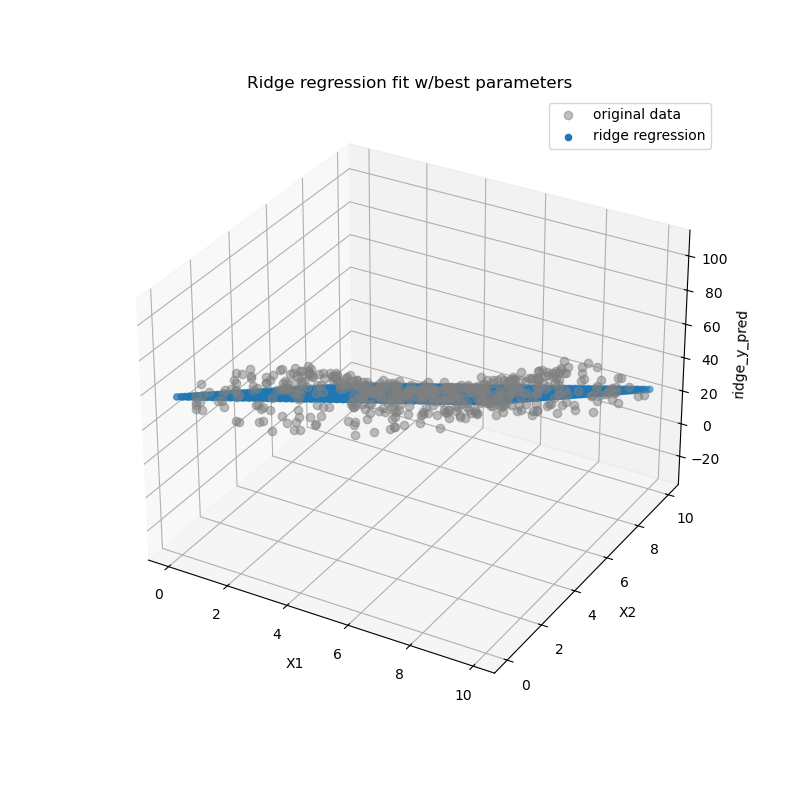

In [177]:
%matplotlib widget 

fig = plt.figure(figsize=(8,8))
ax4 = fig.add_subplot(111, projection='3d')

ax4.plot(X[:,0], X[:,1], y, color='gray',  #original data points
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label='original data')

#fit data with best options
ridge_y_pred = gridsearch2.predict(np.column_stack([X1meshgrid.flatten(), X2meshgrid.flatten()]))

ax4.scatter(X1meshgrid.flatten(),X2meshgrid.flatten(),ridge_y_pred,label='ridge regression')


ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.set_zlabel('ridge_y_pred')
ax4.set_title('Ridge regression fit w/best parameters')
ax4.legend()
plt.show()

This is a better fit than linear regression, but still not great

In [88]:
#ridgeCV
from sklearn.linear_model import RidgeCV

ridgecv_alphas = [0.05,0.1,0.2,0.5,1.0] #same as given in the problem
ridgecv = RidgeCV(alphas=ridgecv_alphas)
ridgecv.fit(X,y)

print("RidgeCV best alpha:",ridgecv.alpha_)


RidgeCV best alpha: 1.0


This agrees with GridSearchCV

#### 1.5

In [71]:
from sklearn.gaussian_process import GaussianProcessRegressor

#with uncertainties
gp = GaussianProcessRegressor(alpha=(yerr/y)**2)
gp.fit(X,y)
y_pred, dy_pred = gp.predict(X, return_std=True)

#without uncertainties
gp2 = GaussianProcessRegressor()
gp2.fit(X,y)
y2_pred,dy2_pred = gp2.predict(X, return_std=True)



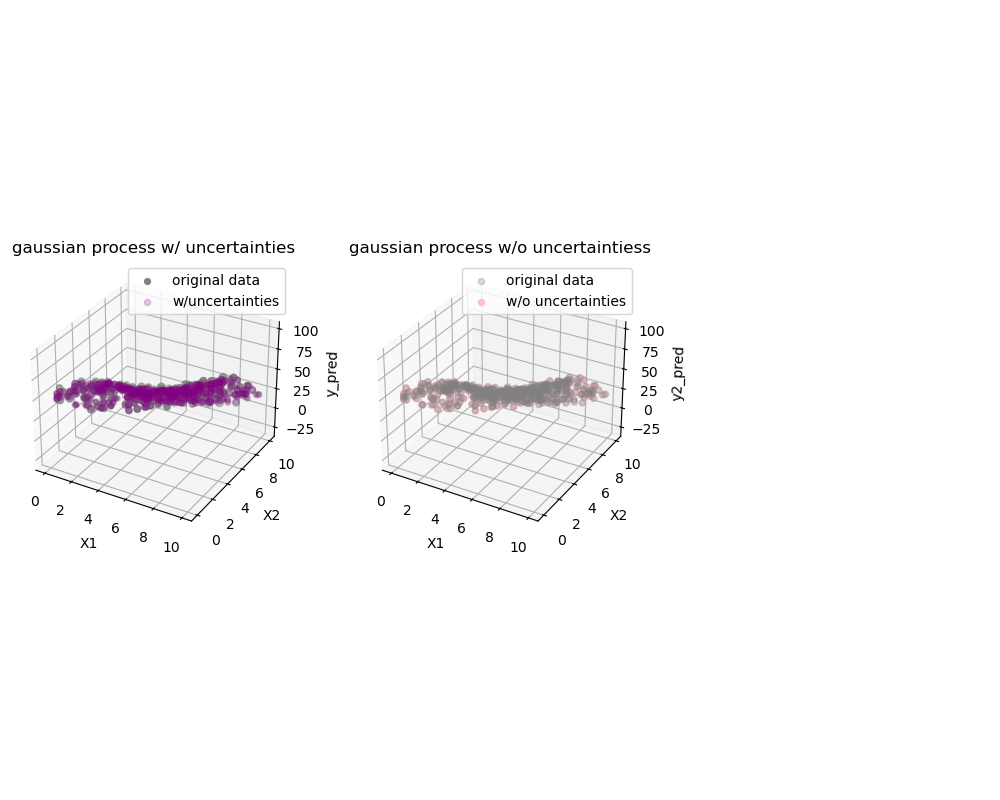

In [141]:
%matplotlib widget  

#plot
fig =plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(131, projection='3d')
#original data
ax1.scatter(X[:, 0], X[:, 1], y,c='gray',label='original data',s=yerr*10)
#with uncertainties
ax1.scatter(X[:, 0], X[:, 1], y_pred,c='purple',label='w/uncertainties',alpha=0.2)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('y_pred')
ax1.set_title('gaussian process w/ uncertainties')


ax2 = fig.add_subplot(132, projection='3d')
#original data
ax2.scatter(X[:, 0], X[:, 1], y,c='gray',label='original data',alpha=0.3)
#without uncertainties
ax2.scatter(X[:, 0], X[:, 1], y2_pred, c='pink',label='w/o uncertainties')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('y2_pred')
ax2.set_title('gaussian process w/o uncertaintiess')

plt.tight_layout(w_pad=5.0)
ax1.legend()
ax2.legend()
plt.show()


The fit appears better with uncertainties accounted for, but only marignally

#### 1.6

In [100]:
from astroML.linear_model import PolynomialRegression

degree = 4 
polynomial_model = PolynomialRegression(degree)
polynomial_model.fit(X, y)

#predict on the meshgrid
grid_pred = polynomial_model.predict(np.column_stack([X1meshgrid.flatten(), X2meshgrid.flatten()]))
n_constraints = degree + 1
print(polynomial_model.coef_)


[ 5.00363666e+01  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


In [132]:
%matplotlib inline

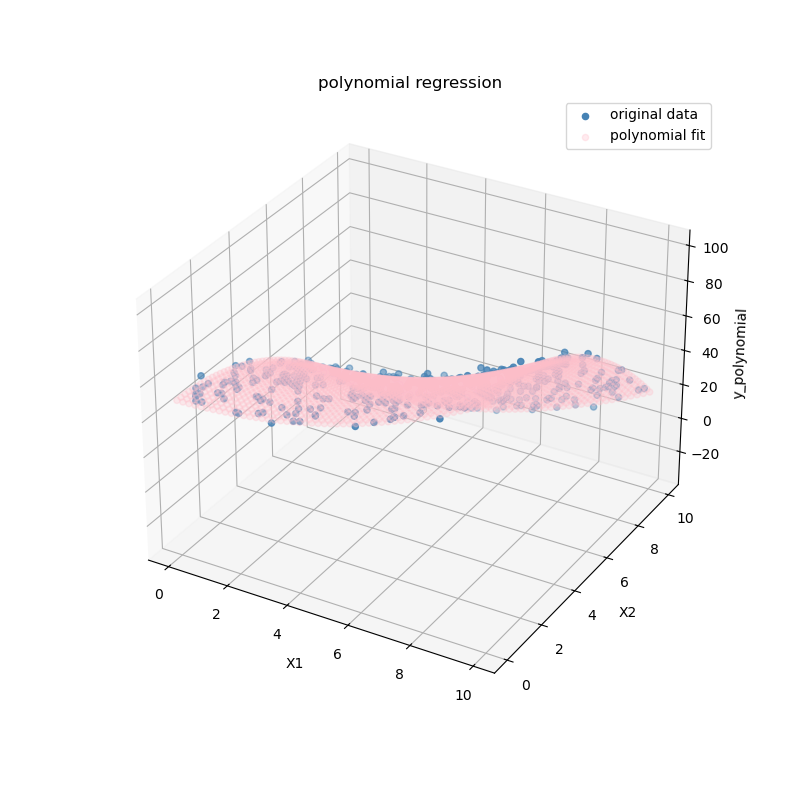

In [140]:
#visualize
%matplotlib widget 

fig = plt.figure(figsize=(8, 8))
ax5 = fig.add_subplot(111, projection='3d')

#originaldata
ax5.scatter(X[:, 0], X[:, 1], y, color='steelblue', label='original data')

#polynomial fit
ax5.scatter(X1meshgrid.flatten(), X2meshgrid.flatten(), grid_pred, color='pink', alpha=0.3, label='polynomial fit')

ax5.set_xlabel('X1')
ax5.set_ylabel('X2')
ax5.set_zlabel('y_polynomial')
ax5.set_title('polynomial regression')
ax5.legend()
plt.show()

This looks like the best fit compared to the linear regression and gaussian process models.

#### 1.7

7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

In [161]:
from sklearn.model_selection import train_test_split

#train-test split
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y, yerr, test_size=0.2)

#cross-validation set
X_train, X_cv, y_train, y_cv, yerr_train, yerr_cv = train_test_split(X_train, y_train, yerr_train, test_size=0.2)

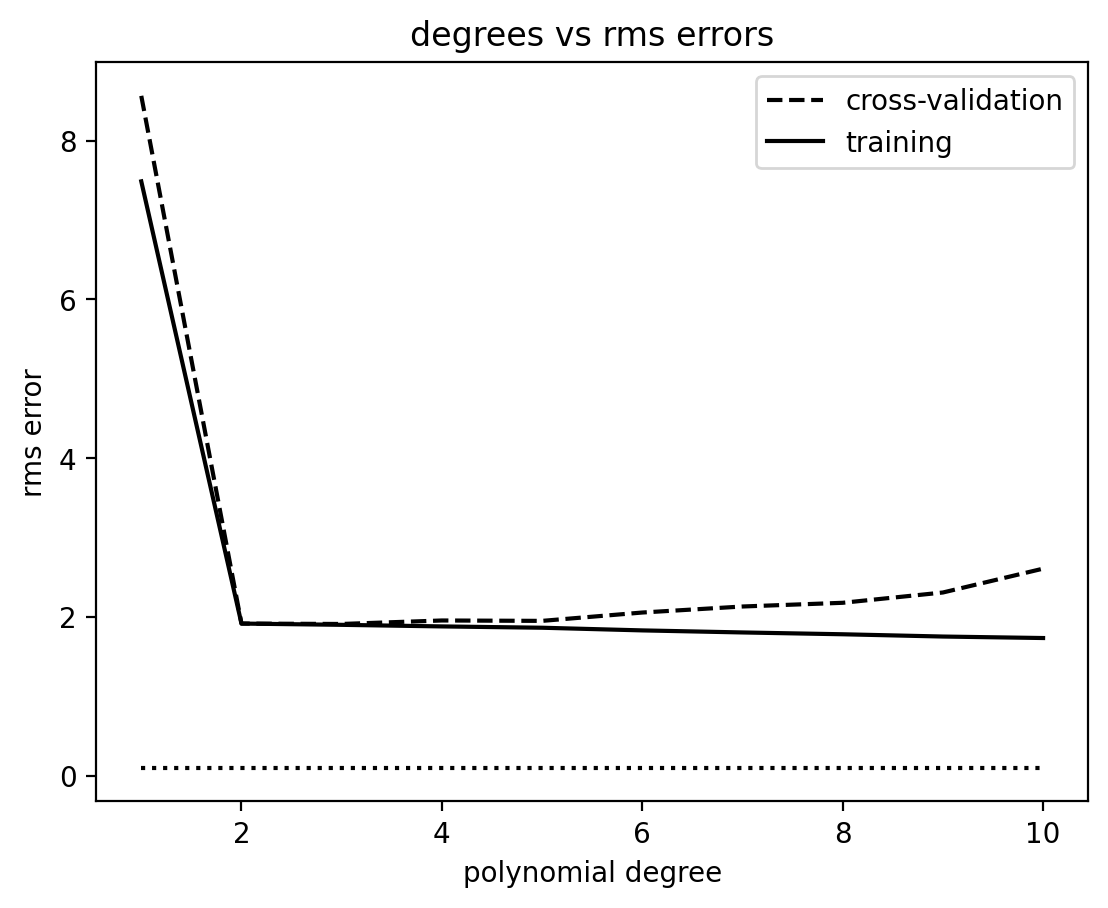

In [176]:
%matplotlib inline
degrees = np.arange(1, 11)
training_err = np.zeros(degrees.shape)
crossval_err = np.zeros(degrees.shape)
BIC_train = np.zeros(degrees.shape)
BIC_crossval = np.zeros(degrees.shape)

for d in range(len(degrees)):
    poly = PolynomialRegression(degree=degrees[d])
    #same process as 1.6
    poly.fit(X_train, y_train)
    y_train_pred = poly.predict(X_train)
    y_cv_pred = poly.predict(X_cv)
    #rms (from lecture 17)
    training_err[d] = np.sqrt(np.sum((y_train_pred - y_train) ** 2)
                              / len(y_train))   
    crossval_err[d] = np.sqrt(np.sum(((y_cv_pred - y_cv) ** 2)
                              / len(y_cv)))
    #BIC (from lecture 17)
    #BIC_train[d] = np.sqrt(len(y_train)) * training_err[d] / yerr_train + degrees[d] * np.log(len(y_train))
    #BIC_crossval[d] = np.sqrt(len(y_cv)) * crossval_err[d] / yerr_cv + degrees[d] * np.log(len(y_cv))

    
#plot(from lecture 17)

plt.plot(degrees, crossval_err, '--k', label='cross-validation')
plt.plot(degrees, training_err, '-k', label='training')
plt.plot(degrees, 0.1 * np.ones(degrees.shape), ':k')

plt.xlabel('polynomial degree')
plt.ylabel('rms error')
plt.title('degrees vs rms errors')
plt.legend()
plt.show()

#plotting for BIC (from lecture 17)
#ax7 = fig.add_subplot(212)
#ax7.plot(d, BIC_crossval, '--k', label='cross-validation')
#ax7.plot(d, BIC_train, '-k', label='training')

#ax7.set_xlim(0, 14)
#ax7.set_ylim(0, 100)

#ax7.legend()
#ax7.set_xlabel('polynomial degree')
#ax7.set_ylabel('BIC')



I couldn't figure out how to calculate the BICs, but I left my attempts commented in the cell above. However, I can do the rest of the problem without the BIC.

In [174]:
print("index of optimal degree:",np.argmin(crossval_err))
optimal_degree = degrees[np.argmin(crossval_err)]
print("optimal degree:", optimal_degree)

index of optimal degree: 2
optimal degree: 3


In [175]:
#train on all training data
optimal_degree_model = PolynomialRegression(degree=optimal_degree)
optimal_degree_model.fit(X_train, y_train)

#predict the labels of the test set
y_test_pred = optimal_degree_model.predict(X_test) 

#testing rms error
test_err = np.sqrt(np.sum((y_test_pred - y_test) ** 2)
                              / len(y_test))   

print("testing rms error:", test_err)

testing rms error: 1.8913180064595987
